In [5]:
from google.colab import files
uploaded = files.upload()



Saving rice_data.csv to rice_data.csv


In [3]:
import os
os.listdir()


['.config', 'rice_production_by_country.csv', 'sample_data']

In [6]:
import pandas as pd

df = pd.read_csv("rice_data.csv")
df.head()
# df.columns
df['Unit'].unique()



array(['tonnes'], dtype=object)

In [8]:
df = df.rename(columns={
    'Area': 'Country',
    'Value': 'Production'
})

df.head()


,Country,Year,Unit,Production,Flag,Flag Description
0,Afghanistan,1961,tonnes,319000.0,A,Official figure
1,Afghanistan,1962,tonnes,319000.0,A,Official figure
2,Afghanistan,1963,tonnes,319000.0,A,Official figure
3,Afghanistan,1964,tonnes,380000.0,A,Official figure
4,Afghanistan,1965,tonnes,380000.0,A,Official figure


In [9]:
df['Country'].unique()[:20]


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Azerbaijan', 'Bangladesh', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia'], dtype=object)

In [10]:
india_df = df[df['Country'] == 'India']
india_df = india_df.sort_values('Year')
india_df = india_df[['Year', 'Production']]
india_df = india_df.reset_index(drop=True)

india_df.head()


,Year,Production
0,1961,53494496.0
1,1962,49825552.0
2,1963,55497008.0
3,1964,58962000.0
4,1965,45883504.0


In [11]:
subset = india_df[(india_df['Year'] >= 2000) &
                   (india_df['Year'] <= 2015)]

subset = subset.reset_index(drop=True)
subset


,Year,Production
0,2000,127464896.0
1,2001,139900000.0
2,2002,107730304.0
3,2003,132789000.0
4,2004,124697104.0
5,2005,137690096.0
6,2006,139136992.0
7,2007,144570000.0
8,2008,148036000.0
9,2009,135672992.0


In [12]:
import numpy as np

x = np.array(subset['Year'])
y = np.array(subset['Production'])

x, y


(array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
        2011, 2012, 2013, 2014, 2015]),
 array([1.27464896e+08, 1.39900000e+08, 1.07730304e+08, 1.32789000e+08,
        1.24697104e+08, 1.37690096e+08, 1.39136992e+08, 1.44570000e+08,
        1.48036000e+08, 1.35672992e+08, 1.43963008e+08, 1.57900000e+08,
        1.57800000e+08, 1.59200000e+08, 1.57200000e+08, 1.56540000e+08]))

In [13]:
np.diff(x)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
import numpy as np

def forward_difference_table(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = diff_table[i + 1][j - 1] - diff_table[i][j - 1]

    return diff_table

fd_table = forward_difference_table(y)
fd_table


array([[ 1.27464896e+08,  1.24351040e+07, -4.46048000e+07,
         1.01833192e+08, -1.92212176e+08,  3.36826640e+08,
        -5.68307568e+08,  9.34818152e+08, -1.50600691e+09,
         2.36509882e+09, -3.55064237e+09,  4.89642458e+09,
        -5.72274370e+09,  4.37212830e+09,  2.32185147e+09,
        -1.93627435e+10],
       [ 1.39900000e+08, -3.21696960e+07,  5.72283920e+07,
        -9.03789840e+07,  1.44614464e+08, -2.31480928e+08,
         3.66510584e+08, -5.71188760e+08,  8.59091904e+08,
        -1.18554355e+09,  1.34578222e+09, -8.26319112e+08,
        -1.35061539e+09,  6.69397978e+09, -1.70408920e+10,
         0.00000000e+00],
       [ 1.07730304e+08,  2.50586960e+07, -3.31505920e+07,
         5.42354800e+07, -8.68664640e+07,  1.35029656e+08,
        -2.04678176e+08,  2.87903144e+08, -3.26451648e+08,
         1.60238664e+08,  5.19463104e+08, -2.17693450e+09,
         5.34336438e+09, -1.03469123e+10,  0.00000000e+00,
         0.00000000e+00],
       [ 1.32789000e+08, -8.09189600e

In [15]:
import math

def newton_forward(x, y, value):
    n = len(y)
    diff_table = forward_difference_table(y)

    h = x[1] - x[0]
    p = (value - x[0]) / h

    result = y[0]
    p_term = 1

    for i in range(1, n):
        p_term *= (p - (i - 1))
        result += (p_term * diff_table[0][i]) / math.factorial(i)

    return result


In [16]:
estimate_forward = newton_forward(x, y, 2007.5)
estimate_forward


np.float64(148720551.47476137)

In [17]:
def backward_difference_table(y):
    n = len(y)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y

    for j in range(1, n):
        for i in range(n - 1, j - 1, -1):
            diff_table[i][j] = diff_table[i][j - 1] - diff_table[i - 1][j - 1]

    return diff_table


In [18]:
def newton_backward_limited(x, y, value, degree=4):
    n = len(y)

    # Use only last 'degree+1' points
    x_sub = x[-(degree+1):]
    y_sub = y[-(degree+1):]

    diff_table = backward_difference_table(y_sub)

    h = x_sub[1] - x_sub[0]
    p = (value - x_sub[-1]) / h

    result = y_sub[-1]
    p_term = 1

    for i in range(1, degree+1):
        p_term *= (p + (i - 1))
        result += (p_term * diff_table[len(y_sub)-1][i]) / math.factorial(i)

    return result


In [19]:

estimate_backward = newton_backward_limited(x, y, 2014.5)
estimate_backward


np.float64(156029687.5)

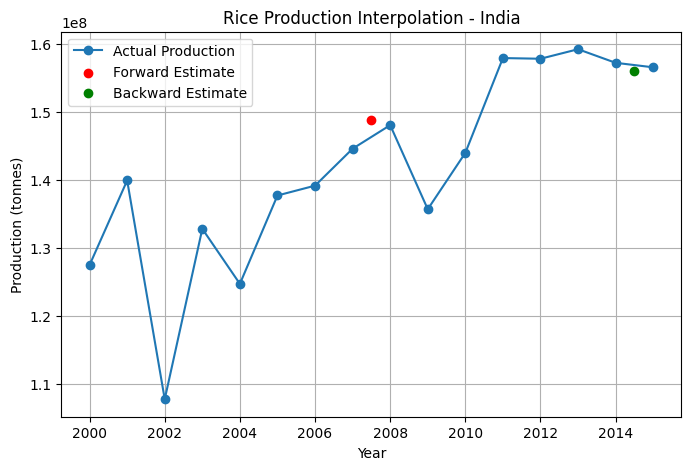

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o-', label='Actual Production')

plt.scatter(2007.5, estimate_forward, color='red', label='Forward Estimate')
plt.scatter(2014.5, estimate_backward, color='green', label='Backward Estimate')

plt.xlabel("Year")
plt.ylabel("Production (tonnes)")
plt.title("Rice Production Interpolation - India")
plt.legend()
plt.grid(True)
plt.show()
